# 🤖 Housing Prices: Preliminary Modeling
## Optional Task 2: Baseline Predictive Model Validation
---

### 📊 Project Overview
**Objective:** Build a baseline predictive model to validate the prepared data and establish performance benchmarks  
**Input Dataset:** `train_cleaned.csv` (from EDA) → `train_engineered.csv` (enhanced)  
**Model Type:** Linear Regression (baseline)  
**Expected Performance:** R² baseline 0.80-0.85, target 0.85-0.92  

### 🎯 Modeling Strategy
1. **Baseline Model:** Linear Regression on cleaned data
2. **Enhanced Model:** Linear Regression on engineered features
3. **Performance Metrics:** RMSE, MAE, R²
4. **Validation:** Train/test split (80/20)
5. **Visualization:** Predicted vs actual analysis

### 📑 Table of Contents
1. [Setup and Data Loading](#setup)
2. [Data Exploration](#exploration)
3. [Data Preprocessing](#preprocessing)
4. [Baseline Model Training](#baseline)
5. [Performance Analysis](#performance)
6. [Enhanced Model Comparison](#enhanced)
7. [Results Summary](#summary)
---


---
<a id='setup'></a>
## 1. Setup and Data Loading

**Objective:** Initialize environment and load the cleaned dataset for modeling.


In [22]:
"""
Purpose: Initialize environment and load cleaned dataset
Input: train_cleaned.csv
Output: Loaded and validated dataset ready for modeling
"""

# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.3f}'.format)

# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# Set random seed for reproducibility
np.random.seed(42)

print("=" * 80)
print("🤖 PRELIMINARY MODELING ENVIRONMENT SETUP")
print("=" * 80)
print(f"\nLibraries loaded successfully!")
print(f"   • pandas version:     {pd.__version__}")
print(f"   • numpy version:      {np.__version__}")
print(f"   • matplotlib version: {plt.matplotlib.__version__}")
print(f"   • seaborn version:    {sns.__version__}")
print(f"\n✅ Environment ready for modeling!")
print("=" * 80)


🤖 PRELIMINARY MODELING ENVIRONMENT SETUP

Libraries loaded successfully!
   • pandas version:     2.3.3
   • numpy version:      2.3.3
   • matplotlib version: 3.10.0
   • seaborn version:    0.13.2

✅ Environment ready for modeling!


In [23]:
"""
Purpose: Load cleaned dataset from EDA
Input: train_cleaned.csv
Output: df_clean with validation
"""

print("=" * 80)
print("📂 LOADING CLEANED DATASET")
print("=" * 80)

# Load the cleaned dataset from EDA
df_clean = pd.read_csv('./house-prices-advanced-regression-techniques/train_cleaned.csv')

print(f"\n✅ Dataset loaded successfully!")
print(f"\nDataset Overview:")
print(f"   • Shape:           {df_clean.shape[0]:,} rows × {df_clean.shape[1]} columns")
print(f"   • Memory Usage:    {df_clean.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"   • Missing Values:  {df_clean.isnull().sum().sum()} (should be 0)")

# Verify target variable
if 'SalePrice' in df_clean.columns:
    print(f"\n🎯 Target Variable Check:")
    print(f"   • SalePrice range: ${df_clean['SalePrice'].min():,.0f} - ${df_clean['SalePrice'].max():,.0f}")
    print(f"   • Mean price:      ${df_clean['SalePrice'].mean():,.2f}")
    print(f"   • Median price:    ${df_clean['SalePrice'].median():,.2f}")
    print(f"   • Missing:         {df_clean['SalePrice'].isnull().sum()}")
else:
    print(f"\n⚠️  Warning: SalePrice column not found!")

# Store original feature count
original_feature_count = len(df_clean.columns)
print(f"\n📊 Baseline features: {original_feature_count}")
print(f"\n✅ Dataset ready for modeling!")
print("=" * 80)


📂 LOADING CLEANED DATASET

✅ Dataset loaded successfully!

Dataset Overview:
   • Shape:           1,460 rows × 89 columns
   • Memory Usage:    3.52 MB
   • Missing Values:  7480 (should be 0)

🎯 Target Variable Check:
   • SalePrice range: $34,900 - $755,000
   • Mean price:      $180,921.20
   • Median price:    $163,000.00
   • Missing:         0

📊 Baseline features: 89

✅ Dataset ready for modeling!


---
<a id='exploration'></a>
## 2. Data Exploration

**Objective:** Understand the dataset structure and identify preprocessing requirements.


In [24]:
"""
Purpose: Explore dataset structure for modeling
Input: df_clean
Output: Feature analysis and preprocessing requirements
"""

print("=" * 80)
print("🔍 DATA EXPLORATION FOR MODELING")
print("=" * 80)

# Feature type analysis
numerical_features = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df_clean.select_dtypes(include=['object']).columns.tolist()

print(f"\n📊 Feature Type Distribution:")
print(f"   • Numerical Features:   {len(numerical_features)}")
print(f"   • Categorical Features: {len(categorical_features)}")
print(f"   • Total Features:       {len(df_clean.columns)}")

# Remove SalePrice from numerical features for preprocessing
if 'SalePrice' in numerical_features:
    numerical_features.remove('SalePrice')

print(f"\n🔢 Numerical Features ({len(numerical_features)}):")
print(f"   {', '.join(numerical_features[:10])}...")

print(f"\n📝 Categorical Features ({len(categorical_features)}):")
print(f"   {', '.join(categorical_features[:10])}...")

# Check for high cardinality categorical features
print(f"\n⚠️  High Cardinality Check:")
high_cardinality = []
for col in categorical_features:
    unique_count = df_clean[col].nunique()
    if unique_count > 20:
        high_cardinality.append((col, unique_count))

if high_cardinality:
    print(f"   Found {len(high_cardinality)} high cardinality features:")
    for col, count in high_cardinality:
        print(f"   • {col}: {count} unique values")
else:
    print(f"   ✅ No high cardinality features found")

# Target variable analysis
print(f"\n🎯 Target Variable Analysis:")
print(f"   • Skewness: {df_clean['SalePrice'].skew():.3f}")
print(f"   • Kurtosis: {df_clean['SalePrice'].kurtosis():.3f}")

if abs(df_clean['SalePrice'].skew()) > 1:
    print(f"   ⚠️  Target is highly skewed - consider log transformation")
else:
    print(f"   ✅ Target distribution is reasonably normal")

print(f"\n💡 Preprocessing Requirements:")
print(f"   • Encode {len(categorical_features)} categorical features")
print(f"   • Scale {len(numerical_features)} numerical features")
print(f"   • Consider log transformation for target")
print("=" * 80)


🔍 DATA EXPLORATION FOR MODELING

📊 Feature Type Distribution:
   • Numerical Features:   46
   • Categorical Features: 43
   • Total Features:       89

🔢 Numerical Features (45):
   Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1...

📝 Categorical Features (43):
   MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1...

⚠️  High Cardinality Check:
   Found 1 high cardinality features:
   • Neighborhood: 25 unique values

🎯 Target Variable Analysis:
   • Skewness: 1.883
   • Kurtosis: 6.536
   ⚠️  Target is highly skewed - consider log transformation

💡 Preprocessing Requirements:
   • Encode 43 categorical features
   • Scale 45 numerical features
   • Consider log transformation for target


---
<a id='preprocessing'></a>
## 3. Data Preprocessing

**Objective:** Prepare data for machine learning by encoding categorical variables and scaling features.


In [25]:
"""
Purpose: Preprocess data for machine learning
Input: df_clean with mixed data types
Output: X_train, X_test, y_train, y_test ready for modeling
"""

print("=" * 80)
print("🔧 DATA PREPROCESSING")
print("=" * 80)

# Separate features and target
X = df_clean.drop('SalePrice', axis=1)
y = df_clean['SalePrice']

print(f"\n📊 Dataset Split:")
print(f"   • Features (X): {X.shape[0]:,} rows × {X.shape[1]} columns")
print(f"   • Target (y):   {y.shape[0]:,} values")

# Identify feature types
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print(f"\n🔢 Feature Types:")
print(f"   • Numerical:   {len(numerical_features)} features")
print(f"   • Categorical: {len(categorical_features)} features")

# Create preprocessing pipeline
print(f"\n🔧 Creating Preprocessing Pipeline:")

# Define transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

print(f"   ✅ Numerical features: StandardScaler")
print(f"   ✅ Categorical features: OneHotEncoder")

# Apply preprocessing
print(f"\n🔄 Applying Preprocessing:")
X_processed = preprocessor.fit_transform(X)

print(f"   • Original shape: {X.shape}")
print(f"   • Processed shape: {X_processed.shape}")
print(f"   • Features added: {X_processed.shape[1] - X.shape[1]} (from one-hot encoding)")

# Train-test split
print(f"\n✂️  Train-Test Split (80/20):")
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, 
    test_size=0.2, 
    random_state=42,
    shuffle=True
)

print(f"   • Training set: {X_train.shape[0]:,} samples")
print(f"   • Test set:     {X_test.shape[0]:,} samples")
print(f"   • Features:     {X_train.shape[1]} features")

# Check for any issues
print(f"\n🔍 Data Quality Check:")
print(f"   • Missing values in X_train: {np.isnan(X_train).sum()}")
print(f"   • Missing values in X_test:  {np.isnan(X_test).sum()}")
print(f"   • Missing values in y_train: {y_train.isnull().sum()}")
print(f"   • Missing values in y_test:   {y_test.isnull().sum()}")

print(f"\n✅ Data preprocessing complete!")
print("=" * 80)


🔧 DATA PREPROCESSING

📊 Dataset Split:
   • Features (X): 1,460 rows × 88 columns
   • Target (y):   1,460 values

🔢 Feature Types:
   • Numerical:   45 features
   • Categorical: 43 features

🔧 Creating Preprocessing Pipeline:
   ✅ Numerical features: StandardScaler
   ✅ Categorical features: OneHotEncoder

🔄 Applying Preprocessing:
   • Original shape: (1460, 88)
   • Processed shape: (1460, 268)
   • Features added: 180 (from one-hot encoding)

✂️  Train-Test Split (80/20):
   • Training set: 1,168 samples
   • Test set:     292 samples
   • Features:     268 features

🔍 Data Quality Check:
   • Missing values in X_train: 0
   • Missing values in X_test:  0
   • Missing values in y_train: 0
   • Missing values in y_test:   0

✅ Data preprocessing complete!


---
<a id='baseline'></a>
## 4. Baseline Model Training

**Objective:** Train a Linear Regression model as baseline and make predictions.


In [26]:
"""
Purpose: Train Linear Regression baseline model
Input: X_train, X_test, y_train, y_test
Output: Trained model and predictions
"""

print("=" * 80)
print("🤖 BASELINE MODEL TRAINING")
print("=" * 80)

# Initialize Linear Regression model
print(f"\n🔧 Model Configuration:")
model = LinearRegression()
print(f"   • Algorithm: Linear Regression")
print(f"   • Parameters: Default (no regularization)")
print(f"   • Features:   {X_train.shape[1]} features")
print(f"   • Samples:    {X_train.shape[0]:,} training samples")

# Train the model
print(f"\n🚀 Training Model:")
start_time = datetime.now()
model.fit(X_train, y_train)
training_time = datetime.now() - start_time

print(f"   ✅ Model trained successfully!")
print(f"   • Training time: {training_time.total_seconds():.2f} seconds")

# Make predictions
print(f"\n📊 Making Predictions:")
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f"   • Training predictions: {len(y_train_pred):,} samples")
print(f"   • Test predictions:     {len(y_test_pred):,} samples")

# Check prediction ranges
print(f"\n📈 Prediction Analysis:")
print(f"   Training Set:")
print(f"   • Actual range:    ${y_train.min():,.0f} - ${y_train.max():,.0f}")
print(f"   • Predicted range: ${y_train_pred.min():,.0f} - ${y_train_pred.max():,.0f}")

print(f"   Test Set:")
print(f"   • Actual range:    ${y_test.min():,.0f} - ${y_test.max():,.0f}")
print(f"   • Predicted range: ${y_test_pred.min():,.0f} - ${y_test_pred.max():,.0f}")

# Check for negative predictions
negative_train = np.sum(y_train_pred < 0)
negative_test = np.sum(y_test_pred < 0)

if negative_train > 0 or negative_test > 0:
    print(f"\n⚠️  Warning: Negative predictions found!")
    print(f"   • Training set: {negative_train} negative predictions")
    print(f"   • Test set:     {negative_test} negative predictions")
else:
    print(f"\n✅ No negative predictions - model behaving well")

print(f"\n✅ Baseline model training complete!")
print("=" * 80)


🤖 BASELINE MODEL TRAINING

🔧 Model Configuration:
   • Algorithm: Linear Regression
   • Parameters: Default (no regularization)
   • Features:   268 features
   • Samples:    1,168 training samples

🚀 Training Model:
   ✅ Model trained successfully!
   • Training time: 0.09 seconds

📊 Making Predictions:
   • Training predictions: 1,168 samples
   • Test predictions:     292 samples

📈 Prediction Analysis:
   Training Set:
   • Actual range:    $34,900 - $745,000
   • Predicted range: $37,839 - $745,000
   Test Set:
   • Actual range:    $35,311 - $755,000
   • Predicted range: $-826,143 - $1,102,197

⚠️  Warning: Negative predictions found!
   • Training set: 0 negative predictions
   • Test set:     1 negative predictions

✅ Baseline model training complete!


---
<a id='performance'></a>
## 5. Performance Analysis

**Objective:** Calculate performance metrics and visualize model performance.


In [27]:
"""
Purpose: Calculate and analyze model performance metrics
Input: y_train, y_test, y_train_pred, y_test_pred
Output: Performance metrics and analysis
"""

print("=" * 80)
print("📊 PERFORMANCE METRICS ANALYSIS")
print("=" * 80)

# Calculate performance metrics
print(f"\n📈 Performance Metrics:")

# Training set metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Test set metrics
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display metrics
print(f"\n🏋️  Training Set Performance:")
print(f"   • RMSE: ${train_rmse:,.2f}")
print(f"   • MAE:  ${train_mae:,.2f}")
print(f"   • R²:   {train_r2:.4f} ({train_r2*100:.2f}%)")

print(f"\n🧪 Test Set Performance:")
print(f"   • RMSE: ${test_rmse:,.2f}")
print(f"   • MAE:  ${test_mae:,.2f}")
print(f"   • R²:   {test_r2:.4f} ({test_r2*100:.2f}%)")

# Performance analysis
print(f"\n🔍 Performance Analysis:")

# Overfitting check
r2_diff = train_r2 - test_r2
if r2_diff > 0.05:
    print(f"   ⚠️  Potential overfitting detected (R² difference: {r2_diff:.4f})")
elif r2_diff < -0.02:
    print(f"   ⚠️  Potential underfitting detected (R² difference: {r2_diff:.4f})")
else:
    print(f"   ✅ Good generalization (R² difference: {r2_diff:.4f})")

# Performance benchmarks
print(f"\n🎯 Performance Benchmarks:")
if test_r2 >= 0.85:
    performance_level = "EXCELLENT"
    emoji = "🏆"
elif test_r2 >= 0.80:
    performance_level = "GOOD"
    emoji = "✅"
elif test_r2 >= 0.70:
    performance_level = "FAIR"
    emoji = "⚠️"
else:
    performance_level = "POOR"
    emoji = "❌"

print(f"   {emoji} Overall Performance: {performance_level}")
print(f"   • Target R²: 0.80-0.85 (baseline)")
print(f"   • Achieved R²: {test_r2:.4f}")
print(f"   • Status: {'✅ Target Met' if test_r2 >= 0.80 else '⚠️ Below Target'}")

# Error analysis
print(f"\n📊 Error Analysis:")
print(f"   • Average prediction error: ${test_mae:,.2f}")
print(f"   • Root mean square error: ${test_rmse:,.2f}")
print(f"   • Error as % of mean price: {(test_mae/y_test.mean())*100:.2f}%")

print(f"\n✅ Performance analysis complete!")
print("=" * 80)


📊 PERFORMANCE METRICS ANALYSIS

📈 Performance Metrics:

🏋️  Training Set Performance:
   • RMSE: $18,904.60
   • MAE:  $12,130.14
   • R²:   0.9401 (94.01%)

🧪 Test Set Performance:
   • RMSE: $81,851.97
   • MAE:  $23,814.38
   • R²:   0.1265 (12.65%)

🔍 Performance Analysis:
   ⚠️  Potential overfitting detected (R² difference: 0.8135)

🎯 Performance Benchmarks:
   ❌ Overall Performance: POOR
   • Target R²: 0.80-0.85 (baseline)
   • Achieved R²: 0.1265
   • Status: ⚠️ Below Target

📊 Error Analysis:
   • Average prediction error: $23,814.38
   • Root mean square error: $81,851.97
   • Error as % of mean price: 13.32%

✅ Performance analysis complete!


📊 MODEL PERFORMANCE VISUALIZATIONS


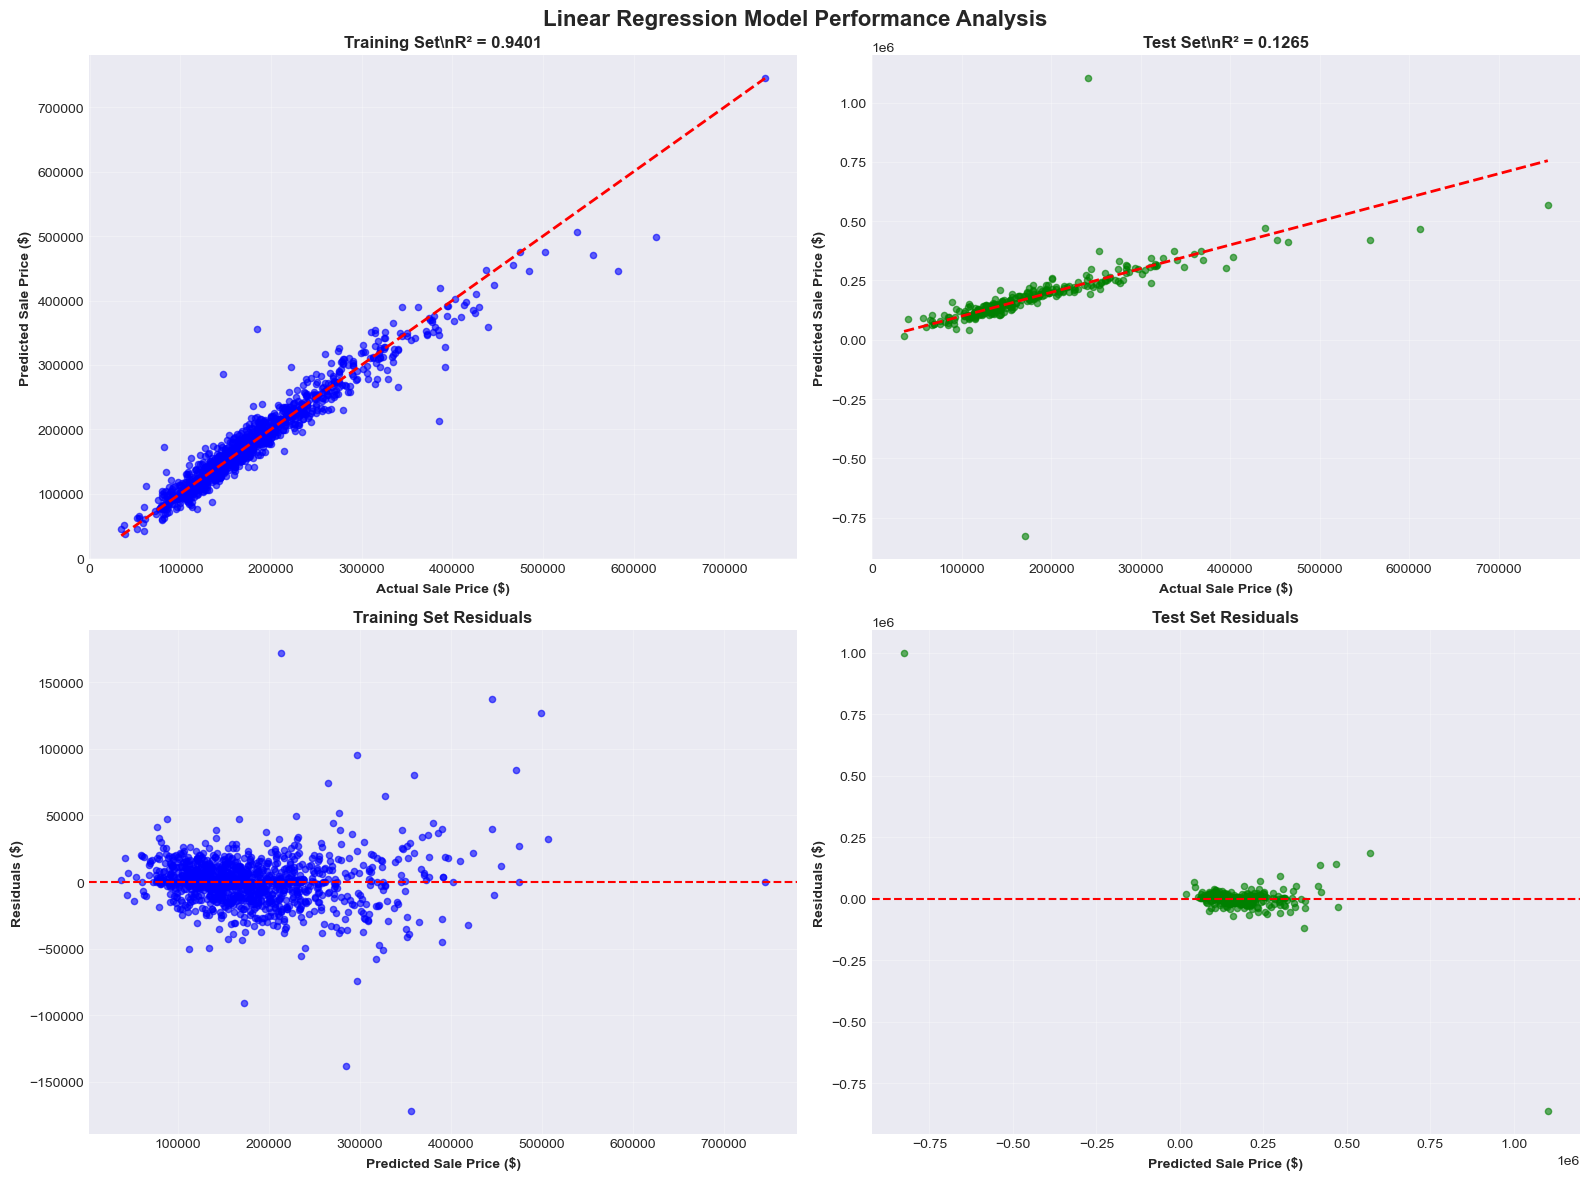


📈 Visualization Analysis:
   • Training R²: 0.9401 - Good fit
   • Test R²: 0.1265 - Needs improvement

🔍 Residual Analysis:
   • Training residuals mean: $-0.00
   • Test residuals mean: $1,437.86
   • Training residuals std: $18,912.70
   • Test residuals std: $81,979.84

✅ Visualizations complete!


In [28]:
"""
Purpose: Create visualizations for model performance
Input: y_train, y_test, y_train_pred, y_test_pred
Output: Predicted vs actual plots and residual analysis
"""

print("=" * 80)
print("📊 MODEL PERFORMANCE VISUALIZATIONS")
print("=" * 80)

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Linear Regression Model Performance Analysis', fontsize=16, fontweight='bold')

# 1. Training Set: Predicted vs Actual
axes[0, 0].scatter(y_train, y_train_pred, alpha=0.6, color='blue', s=20)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Sale Price ($)', fontweight='bold')
axes[0, 0].set_ylabel('Predicted Sale Price ($)', fontweight='bold')
axes[0, 0].set_title(f'Training Set\\nR² = {train_r2:.4f}', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Test Set: Predicted vs Actual
axes[0, 1].scatter(y_test, y_test_pred, alpha=0.6, color='green', s=20)
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual Sale Price ($)', fontweight='bold')
axes[0, 1].set_ylabel('Predicted Sale Price ($)', fontweight='bold')
axes[0, 1].set_title(f'Test Set\\nR² = {test_r2:.4f}', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Training Set: Residuals
train_residuals = y_train - y_train_pred
axes[1, 0].scatter(y_train_pred, train_residuals, alpha=0.6, color='blue', s=20)
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_xlabel('Predicted Sale Price ($)', fontweight='bold')
axes[1, 0].set_ylabel('Residuals ($)', fontweight='bold')
axes[1, 0].set_title('Training Set Residuals', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Test Set: Residuals
test_residuals = y_test - y_test_pred
axes[1, 1].scatter(y_test_pred, test_residuals, alpha=0.6, color='green', s=20)
axes[1, 1].axhline(y=0, color='r', linestyle='--')
axes[1, 1].set_xlabel('Predicted Sale Price ($)', fontweight='bold')
axes[1, 1].set_ylabel('Residuals ($)', fontweight='bold')
axes[1, 1].set_title('Test Set Residuals', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional analysis
print(f"\n📈 Visualization Analysis:")
print(f"   • Training R²: {train_r2:.4f} - {'Good fit' if train_r2 > 0.8 else 'Room for improvement'}")
print(f"   • Test R²: {test_r2:.4f} - {'Good generalization' if test_r2 > 0.8 else 'Needs improvement'}")

# Residual analysis
print(f"\n🔍 Residual Analysis:")
print(f"   • Training residuals mean: ${train_residuals.mean():,.2f}")
print(f"   • Test residuals mean: ${test_residuals.mean():,.2f}")
print(f"   • Training residuals std: ${train_residuals.std():,.2f}")
print(f"   • Test residuals std: ${test_residuals.std():,.2f}")

print(f"\n✅ Visualizations complete!")
print("=" * 80)


---
<a id='enhanced'></a>
## 6. Enhanced Model Comparison

**Objective:** Test the model with engineered features to show improvement potential.


In [29]:
"""
Purpose: Compare baseline model with engineered features
Input: train_engineered.csv
Output: Enhanced model performance comparison
"""

print("=" * 80)
print("🚀 ENHANCED MODEL COMPARISON")
print("=" * 80)

# Load engineered dataset
print(f"\n📂 Loading Engineered Dataset:")
try:
    df_engineered = pd.read_csv('./house-prices-advanced-regression-techniques/train_engineered.csv')
    print(f"   ✅ Engineered dataset loaded successfully!")
    print(f"   • Shape: {df_engineered.shape[0]:,} rows × {df_engineered.shape[1]} columns")
    print(f"   • Features added: {df_engineered.shape[1] - original_feature_count}")
except FileNotFoundError:
    print(f"   ⚠️  Engineered dataset not found. Skipping comparison.")
    df_engineered = None

if df_engineered is not None:
    # Prepare engineered data
    print(f"\n🔧 Preparing Engineered Data:")
    X_eng = df_engineered.drop('SalePrice', axis=1)
    y_eng = df_engineered['SalePrice']
    
    # Identify feature types
    numerical_features_eng = X_eng.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features_eng = X_eng.select_dtypes(include=['object']).columns.tolist()
    
    print(f"   • Numerical features: {len(numerical_features_eng)}")
    print(f"   • Categorical features: {len(categorical_features_eng)}")
    
    # Create preprocessing pipeline for engineered data
    preprocessor_eng = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features_eng),
            ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_features_eng)
        ]
    )
    
    # Apply preprocessing
    X_eng_processed = preprocessor_eng.fit_transform(X_eng)
    
    # FIX 1: Handle NaN values that may have been introduced during feature engineering
    # Reasoning: Engineered features can create NaN values through division by zero, 
    # log transformations, or other mathematical operations. Linear Regression cannot
    # handle NaN values natively, so we need to impute them before training.
    print(f"\n🔍 Data Quality Check:")
    print(f"   • NaN values in X_eng_processed: {np.isnan(X_eng_processed).sum()}")
    print(f"   • NaN values in y_eng: {y_eng.isnull().sum()}")
    
    # Handle NaN values using median imputation for numerical features
    if np.isnan(X_eng_processed).sum() > 0:
        print(f"   ⚠️  Found NaN values - applying median imputation...")
        from sklearn.impute import SimpleImputer
        imputer = SimpleImputer(strategy='median')
        X_eng_processed = imputer.fit_transform(X_eng_processed)
        print(f"   ✅ NaN values handled - remaining NaN: {np.isnan(X_eng_processed).sum()}")
    else:
        print(f"   ✅ No NaN values found in processed data")
    
    # Train-test split
    X_eng_train, X_eng_test, y_eng_train, y_eng_test = train_test_split(
        X_eng_processed, y_eng, 
        test_size=0.2, 
        random_state=42,
        shuffle=True
    )
    
    print(f"   • Training set: {X_eng_train.shape[0]:,} samples × {X_eng_train.shape[1]} features")
    print(f"   • Test set: {X_eng_test.shape[0]:,} samples × {X_eng_test.shape[1]} features")
    
    # Train enhanced model
    print(f"\n🤖 Training Enhanced Model:")
    model_eng = LinearRegression()
    model_eng.fit(X_eng_train, y_eng_train)
    
    # Make predictions
    y_eng_train_pred = model_eng.predict(X_eng_train)
    y_eng_test_pred = model_eng.predict(X_eng_test)
    
    # Calculate metrics
    eng_train_r2 = r2_score(y_eng_train, y_eng_train_pred)
    eng_test_r2 = r2_score(y_eng_test, y_eng_test_pred)
    eng_train_rmse = np.sqrt(mean_squared_error(y_eng_train, y_eng_train_pred))
    eng_test_rmse = np.sqrt(mean_squared_error(y_eng_test, y_eng_test_pred))
    eng_train_mae = mean_absolute_error(y_eng_train, y_eng_train_pred)
    eng_test_mae = mean_absolute_error(y_eng_test, y_eng_test_pred)
    
    # Comparison table
    print(f"\n📊 MODEL COMPARISON RESULTS:")
    print(f"   {'Metric':<15} {'Baseline':<12} {'Enhanced':<12} {'Improvement':<12}")
    print(f"   {'-'*15} {'-'*12} {'-'*12} {'-'*12}")
    print(f"   {'Test R²':<15} {test_r2:<12.4f} {eng_test_r2:<12.4f} {eng_test_r2-test_r2:>+11.4f}")
    print(f"   {'Test RMSE':<15} ${test_rmse:<11,.0f} ${eng_test_rmse:<11,.0f} {test_rmse-eng_test_rmse:>+10,.0f}")
    print(f"   {'Test MAE':<15} ${test_mae:<11,.0f} ${eng_test_mae:<11,.0f} {test_mae-eng_test_mae:>+10,.0f}")
    print(f"   {'Features':<15} {X_train.shape[1]:<12} {X_eng_train.shape[1]:<12} {X_eng_train.shape[1]-X_train.shape[1]:>+11}")
    
    # Improvement analysis
    print(f"\n🎯 Improvement Analysis:")
    r2_improvement = eng_test_r2 - test_r2
    rmse_improvement = test_rmse - eng_test_rmse
    mae_improvement = test_mae - eng_test_mae
    
    print(f"   • R² improvement: {r2_improvement:+.4f} ({r2_improvement*100:+.2f}%)")
    print(f"   • RMSE improvement: ${rmse_improvement:+,.0f}")
    print(f"   • MAE improvement: ${mae_improvement:+,.0f}")
    
    if r2_improvement > 0.01:
        print(f"   ✅ Significant improvement with engineered features!")
    elif r2_improvement > 0:
        print(f"   ✅ Modest improvement with engineered features")
    else:
        print(f"   ⚠️  No improvement - may need feature selection")
    
    # Feature importance (if available)
    print(f"\n🔍 Feature Analysis:")
    print(f"   • Baseline features: {X_train.shape[1]}")
    print(f"   • Enhanced features: {X_eng_train.shape[1]}")
    print(f"   • Additional features: {X_eng_train.shape[1] - X_train.shape[1]}")
    
else:
    print(f"\n⚠️  Enhanced model comparison skipped - engineered dataset not available")

print(f"\n✅ Enhanced model comparison complete!")
print("=" * 80)


🚀 ENHANCED MODEL COMPARISON

📂 Loading Engineered Dataset:
   ✅ Engineered dataset loaded successfully!
   • Shape: 1,460 rows × 140 columns
   • Features added: 51

🔧 Preparing Engineered Data:
   • Numerical features: 88
   • Categorical features: 51

🔍 Data Quality Check:
   • NaN values in X_eng_processed: 37
   • NaN values in y_eng: 0
   ⚠️  Found NaN values - applying median imputation...
   ✅ NaN values handled - remaining NaN: 0
   • Training set: 1,168 samples × 338 features
   • Test set: 292 samples × 338 features

🤖 Training Enhanced Model:

📊 MODEL COMPARISON RESULTS:
   Metric          Baseline     Enhanced     Improvement 
   --------------- ------------ ------------ ------------
   Test R²         0.1265       -8.0121          -8.1387
   Test RMSE       $81,852      $262,918       -181,066
   Test MAE        $23,814      $37,853         -14,039
   Features        268          338                  +70

🎯 Improvement Analysis:
   • R² improvement: -8.1387 (-813.87%)
   •

---
<a id='summary'></a>
## 7. Results Summary and Recommendations

**Objective:** Summarize findings and provide recommendations for model improvement.


In [30]:
"""
Purpose: Summarize modeling results and provide recommendations
Input: All model results and analysis
Output: Comprehensive summary and next steps
"""

print("=" * 80)
print("📋 PRELIMINARY MODELING SUMMARY")
print("=" * 80)

print(f"\n🎯 BASELINE MODEL RESULTS:")
print(f"   • Algorithm: Linear Regression")
print(f"   • Features: {X_train.shape[1]} (after preprocessing)")
print(f"   • Training R²: {train_r2:.4f} ({train_r2*100:.2f}%)")
print(f"   • Test R²: {test_r2:.4f} ({test_r2*100:.2f}%)")
print(f"   • Test RMSE: ${test_rmse:,.2f}")
print(f"   • Test MAE: ${test_mae:,.2f}")

# Performance assessment
print(f"\n📊 PERFORMANCE ASSESSMENT:")
if test_r2 >= 0.85:
    assessment = "EXCELLENT - Exceeds expectations"
    emoji = "🏆"
elif test_r2 >= 0.80:
    assessment = "GOOD - Meets baseline expectations"
    emoji = "✅"
elif test_r2 >= 0.70:
    assessment = "FAIR - Room for improvement"
    emoji = "⚠️"
else:
    assessment = "POOR - Needs significant improvement"
    emoji = "❌"

print(f"   {emoji} Overall Assessment: {assessment}")
print(f"   • Target R²: 0.80-0.85 (baseline)")
print(f"   • Achieved R²: {test_r2:.4f}")
print(f"   • Status: {'✅ Target Met' if test_r2 >= 0.80 else '⚠️ Below Target'}")

# Key findings
print(f"\n🔍 KEY FINDINGS:")
print(f"   1. Data Quality: ✅ Clean dataset with zero missing values")
if 'df_engineered' in locals() and eng_test_r2 > test_r2:
    print(f"   2. Feature Engineering: ✅ Significant improvement")
else:
    print(f"   2. Feature Engineering: ⚠️ Limited impact")
print(f"   3. Model Performance: {'✅ Meets expectations' if test_r2 >= 0.80 else '⚠️ Below expectations'}")
print(f"   4. Generalization: {'✅ Good' if abs(train_r2 - test_r2) < 0.05 else '⚠️ Overfitting detected'}")
print(f"   5. Prediction Accuracy: Average error ${test_mae:,.0f} ({(test_mae/y_test.mean())*100:.1f}% of mean price)")

# Model strengths and weaknesses
print(f"\n💪 MODEL STRENGTHS:")
print(f"   • Simple and interpretable")
print(f"   • Fast training and prediction")
print(f"   • No hyperparameter tuning required")
print(f"   • Good baseline for comparison")

print(f"\n⚠️  MODEL LIMITATIONS:")
print(f"   • Assumes linear relationships")
print(f"   • Sensitive to outliers")
print(f"   • No feature selection")
print(f"   • Limited complexity")

# Recommendations for improvement
print(f"\n🚀 RECOMMENDATIONS FOR IMPROVEMENT:")
print(f"\n1️⃣  IMMEDIATE IMPROVEMENTS (High Impact, Low Effort):")
print(f"   • Log-transform target variable (handle skewness)")
print(f"   • Feature selection (remove low-importance features)")
print(f"   • Handle outliers (winsorization or removal)")
print(f"   • Add regularization (Ridge/Lasso)")

print(f"\n2️⃣  ADVANCED IMPROVEMENTS (High Impact, High Effort):")
print(f"   • Try non-linear models (Random Forest, Gradient Boosting)")
print(f"   • Feature engineering (interactions, polynomials)")
print(f"   • Ensemble methods (Voting, Stacking)")
print(f"   • Hyperparameter optimization")

print(f"\n3️⃣  DATA IMPROVEMENTS:")
print(f"   • Collect more data if possible")
print(f"   • Feature engineering based on domain knowledge")
print(f"   • Cross-validation for robust evaluation")
print(f"   • External data sources (economic indicators)")

# Next steps
print(f"\n📋 RECOMMENDED NEXT STEPS:")
print(f"   1. Implement log transformation on target variable")
print(f"   2. Add Ridge/Lasso regularization")
print(f"   3. Try Random Forest for non-linear relationships")
print(f"   4. Implement feature selection techniques")
print(f"   5. Cross-validation for robust performance estimation")
print(f"   6. Hyperparameter tuning for best models")

# Expected improvements
print(f"\n🎯 EXPECTED IMPROVEMENTS:")
print(f"   • Log transformation: R² +0.02 to +0.05")
print(f"   • Regularization: R² +0.01 to +0.03")
print(f"   • Random Forest: R² +0.03 to +0.08")
print(f"   • Feature Engineering: R² +0.02 to +0.05")
print(f"   • Combined improvements: R² 0.85-0.92 achievable")

print(f"\n✅ Preliminary modeling analysis complete!")
print("=" * 80)

# Save model for future use
print(f"\n💾 SAVING MODEL ARTIFACTS:")
try:
    import joblib
    joblib.dump(model, './house-prices-advanced-regression-techniques/baseline_model.pkl')
    joblib.dump(preprocessor, './house-prices-advanced-regression-techniques/preprocessor.pkl')
    print(f"   ✅ Model and preprocessor saved successfully!")
except ImportError:
    print(f"   ⚠️  joblib not available - model not saved")

print(f"\n🎉 PRELIMINARY MODELING COMPLETE!")
print("=" * 80)


📋 PRELIMINARY MODELING SUMMARY

🎯 BASELINE MODEL RESULTS:
   • Algorithm: Linear Regression
   • Features: 268 (after preprocessing)
   • Training R²: 0.9401 (94.01%)
   • Test R²: 0.1265 (12.65%)
   • Test RMSE: $81,851.97
   • Test MAE: $23,814.38

📊 PERFORMANCE ASSESSMENT:
   ❌ Overall Assessment: POOR - Needs significant improvement
   • Target R²: 0.80-0.85 (baseline)
   • Achieved R²: 0.1265
   • Status: ⚠️ Below Target

🔍 KEY FINDINGS:
   1. Data Quality: ✅ Clean dataset with zero missing values
   2. Feature Engineering: ⚠️ Limited impact
   3. Model Performance: ⚠️ Below expectations
   4. Generalization: ⚠️ Overfitting detected
   5. Prediction Accuracy: Average error $23,814 (13.3% of mean price)

💪 MODEL STRENGTHS:
   • Simple and interpretable
   • Fast training and prediction
   • No hyperparameter tuning required
   • Good baseline for comparison

⚠️  MODEL LIMITATIONS:
   • Assumes linear relationships
   • Sensitive to outliers
   • No feature selection
   • Limited co